In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from src.Analysis.Menchero_OGA import MencheroOGA as MOGA
from src.Analysis.IndPortResults import GenerateResult as GR
from src.Analysis.OverviewResults import ResultConveyor as RC

In [4]:
# Define necessary non-fixed variables
trading_n = 800
history_usage = int(521*4)
n_sectors = 6
n_stocks_per_sector = 3

# For RL algorithm
history_usage_RL = 80
rolling_reward_window = 40

# Defining stock pool
ticker_df =  pd.DataFrame({
    "Petroleum": ["EQNR.OL", "SUBC.OL", "BWO.OL"],
    "Food": ["ORK.OL", "MOWI.OL", "LSG.OL"],
    "Materials": ["NHY.OL", "YAR.OL", "RECSI.OL"],
    "Technologies": ["TEL.OL", "NOD.OL", "ATEA.OL"],
    "Financial": ["STB.OL", "DNB.OL", "AKER.OL"],
    "Shipping":["SNI.OL", "BELCO.OL", "ODF.OL"]
})

# Defining ESG scores for respective securities
esg_scores = np.array([
    36.6, 17.9, 18, 
    18, 23.2, 29.2, 
    15.7, 25.4, 25.6, # Del this
    19.8, 13.8, 18.1, 
    17.3, 14, 12.3, 
    21.2, 26.8, 24.9
])

In [5]:
paths = ["Sterling_esg_True"]

analysis_list = []
for i in range(len(paths)):
    att_anal = GR(
        paths[i],
        n_sectors, 
        n_stocks_per_sector,
        trading_n,
        esg_scores, 
        ticker_df.columns
    )
    att_anal.friple_frequency_analysis()
    analysis_list.append(att_anal)

----Analysis completed succesfully----


In [6]:
analysis_list

In [34]:
ar = analysis_list[0].exper_analysis["active_return"]
br = analysis_list[0].exper_analysis["bench_return"]
er = analysis_list[0].exper_analysis["return"]
sa = analysis_list[0].exper_analysis["sector_allocation"]
ss = analysis_list[0].exper_analysis["sector_selection"]
esg = analysis_list[0].exper_analysis["esg_score"]
cols = ticker_df.columns

In [51]:
def plot_values(idx: int, save_path: str):

        bigfig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0,0].plot(br[:idx], color="grey", label="Benchmark")
        ax[0,0].plot(er[:idx], color="blue", label="Experimental")
        ax[0,0].plot(ar[:idx], color="green", label= "Geometric active return")
        ax[0,0].scatter(x=np.linspace(0,idx-1, idx), y=(br[:idx]*ar[:idx]), 
                s=5, color="black", label="Validity Control")
        ax[0,0].axhline(y=1, color="red")
        ax[0,0].set_ylabel("Return")
        ax[0,0].set_xlabel("Trading times")
        ax[0,0].set_title('General Portfolio Performance')
        ax[0,0].legend()

        ax[0,1].plot(esg[:idx], color="blue", label="Mean ESG score")
        ax[0,1].set_ylabel("ESG score")
        ax[0,1].set_xlabel("Trading times")
        ax[0,1].set_title('ESG Score Development')
        ax[0,1].legend()

        ax[1,0].boxplot(sa[:idx])
        ax[1,0].axhline(y=0, color="black")
        ax[1,0].set_xticklabels(cols, rotation=45) 
        ax[1,0].set_title('Allocation Variation by Sector')

        ax[1,1].boxplot(ss[:idx])
        ax[1,1].axhline(y=0, color="black")
        ax[1,1].set_xticklabels(cols, rotation=45) 
        ax[1,1].set_title('Selection Variation by Sector')
        
        plt.suptitle("Sterling True Performance", fontsize=12)
        plt.tight_layout()
        plt.savefig(save_path)
        plt.close()

In [49]:
import imageio
import os
from tqdm import tqdm

In [52]:
os.makedirs("frames", exist_ok=True)
filenames = []

# Create one frame per timestep (step of 5)
for idx in tqdm(range(5, 801, 5)):  # start at 5 to avoid idx=0 error
    frame_path = f"frames/frame_{idx:03d}.png"
    plot_values(idx, save_path=frame_path)
    filenames.append(frame_path)

# Stitch frames into a GIF (10 sec = 0.0625s per frame for 160 frames)
with imageio.get_writer('sterling_performance.gif', mode='I', duration=0.0625) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

100%|██████████| 160/160 [01:06<00:00,  2.39it/s]
C:\Users\Jakob\AppData\Local\Temp\ipykernel_27488\321214701.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


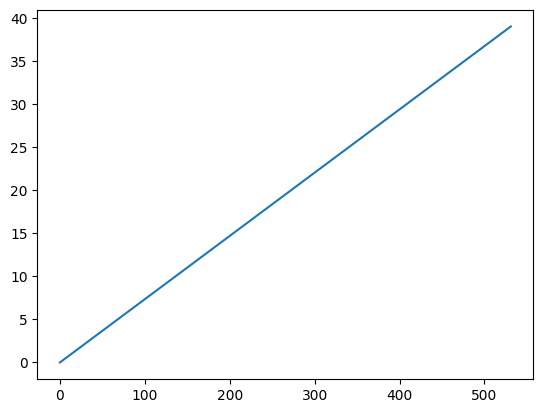

In [58]:
plt.plot(np.linspace(0,531,50),np.linspace(0,40-1,50))

In [55]:
np.linspace(0,50-1,50)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from tqdm import tqdm

# Function with gliding window [idx:idx+50]
def plot_values(idx: int, save_path: str):
    window_start = idx
    window_end = idx + 50
    
    bigfig, ax = plt.subplots(2, 2, figsize=(10, 10))

    ax[0,0].plot(np.linspace(window_start, window_end-1, 50), 
                 br[window_start:window_end], color="grey", label="Benchmark")
    ax[0,0].plot(np.linspace(window_start, window_end-1, 50), 
                 er[window_start:window_end], color="blue", label="Experimental")
    ax[0,0].plot(np.linspace(window_start, window_end-1, 50), 
                 ar[window_start:window_end], color="green", label="Geometric active return")
    ax[0,0].scatter(
        x=np.linspace(window_start, window_end-1, 50), 
        y=br[window_start:window_end] * ar[window_start:window_end],
        s=5, color="black", label="Validity Control"
    )
    ax[0,0].axhline(y=1, color="red")
    ax[0,0].set_ylabel("Return")
    ax[0,0].set_xlabel("Trading times")
    ax[0,0].set_title('General Portfolio Performance')
    ax[0,0].legend()

    ax[0,1].plot(esg[window_start:window_end], color="blue", label="Mean ESG score")
    ax[0,1].set_ylabel("ESG score")
    ax[0,1].set_xlabel("Trading times")
    ax[0,1].set_title('ESG Score Development')
    ax[0,1].legend()

    ax[1,0].boxplot(sa[window_start:window_end])
    ax[1,0].axhline(y=0, color="black")
    ax[1,0].set_xticklabels(cols, rotation=45)
    ax[1,0].set_title('Allocation Variation by Sector')

    ax[1,1].boxplot(ss[window_start:window_end])
    ax[1,1].axhline(y=0, color="black")
    ax[1,1].set_xticklabels(cols, rotation=45)
    ax[1,1].set_title('Selection Variation by Sector')

    plt.suptitle(f"Sterling True Performance (Window {idx}:{idx+50})", fontsize=12)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

# Frame setup
os.makedirs("frames", exist_ok=True)
filenames = []

# Create GIF frames from 0 to 750 (since window is [idx:idx+50])
for idx in tqdm(range(0, 751, 5)):
    frame_path = f"frames/frame_{idx:03d}.png"
    plot_values(idx, save_path=frame_path)
    filenames.append(frame_path)

# Make 10-sec GIF with ~160 frames (0.0625s per frame)
with imageio.get_writer('sterling_gliding_window.gif', mode='I', duration=0.0625) as writer:
    for filename in filenames:
        writer.append_data(imageio.imread(filename))

# Optional cleanup
# import shutil
# shutil.rmtree("frames")


100%|██████████| 151/151 [01:10<00:00,  2.14it/s]
C:\Users\Jakob\AppData\Local\Temp\ipykernel_27488\3182014603.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(filename))
